<a href="https://colab.research.google.com/github/Joycelyn96/Project-1/blob/main/mobile_Project_(1)_final_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('Mobile_Food_Facility_Permit_20240406.csv', low_memory=False)

# Print a sample of the data to inspect its contents
print("Sample of the data:")
print(data.head())

# Check for different types of non-numeric values
non_numeric_rows = data.apply(lambda row: any(not str(cell).isdigit() for cell in row), axis=1)

# Identify the specific non-numeric values
non_numeric_values = set()
for index, row in data.iterrows():
    for cell in row:
        if not str(cell).isdigit():
            non_numeric_values.add(cell)

print("Non-numeric values in the dataset:")
print(non_numeric_values)

# Update the preprocessing steps to handle non-numeric values appropriately
# For example, if the non-numeric values represent missing data, you can replace them with NaN
data.replace(non_numeric_values, np.nan, inplace=True)

# Remove rows with missing values
data.dropna(inplace=True)

print("Length of dataset after removing rows with missing values:", len(data))

# Check if dataset is large enough to split
if len(data) > 1:
    # Prepare data
    X = data.drop(columns=['cnn']).values
    y = data['cnn'].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Define model
    class RegressionModel(nn.Module):
        def __init__(self, input_size):
            super(RegressionModel, self).__init__()
            self.fc1 = nn.Linear(input_size, 64)
            self.fc2 = nn.Linear(64, 32)
            self.fc3 = nn.Linear(32, 1)

        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            x = self.fc3(x)
            return x

    model = RegressionModel(X_train_scaled.shape[1])

    # Define loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    for epoch in range(50):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Evaluate model
    with torch.no_grad():
        test_outputs = model(torch.tensor(X_test_scaled, dtype=torch.float32))
        test_loss = criterion(test_outputs, torch.tensor(y_test, dtype=torch.float32))
        print("Test Loss:", test_loss.item())
else:
    print("Dataset is too small to split.")




Sample of the data:
   locationid           Applicant FacilityType       cnn  \
0      735318    Ziaurehman Amini    Push Cart  30727000   
1      848184  Reecees Soulicious        Truck   2799106   
2     1343831          Got Snacks    Push Cart    184001   
3     1047831    The Chef Station        Truck    480000   
4      934516       Scotch Bonnet        Truck    101000   

                                 LocationDescription             Address  \
0                   MARKET ST: DRUMM ST intersection   5 THE EMBARCADERO   
1  BAY SHORE BLVD: BAY SHORE BLVD to OAKDALE AVE ...  201 BAY SHORE BLVD   
2  03RD ST: TERRY A FRANCOIS BLVD to CHANNEL ST (...        1020 03RD ST   
3  10TH ST: FELL ST \ MARKET ST \ POLK ST to STEV...           8 10TH ST   
4       01ST ST: STEVENSON ST to JESSIE ST (21 - 56)          50 01ST ST   

  blocklot block  lot       permit  ...                Approved  Received  \
0  0234017  0234  017   15MFF-0159  ...                     NaN  20151231   
1  55590

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('Mobile_Food_Facility_Permit_20240406.csv', low_memory=False)

# Drop columns containing URLs
url_columns = [col for col in data.columns if 'http' in str(data[col])]
data_numeric = data.drop(columns=url_columns)

# Drop columns containing non-numeric values
columns_to_drop = ['Applicant', 'FacilityType', 'LocationDescription', 'Address', 'blocklot', 'block', 'lot', 'permit', 'Status', 'FoodItems', 'Approved', 'ExpirationDate', 'Location']

data_numeric.drop(columns=columns_to_drop, inplace=True)

# Remove rows with missing values
data_numeric.dropna(inplace=True)

print("Length of dataset after removing rows with missing values:", len(data_numeric))

# Check if dataset is large enough to split
if len(data_numeric) > 1:
    # Prepare data
    X = data_numeric.drop(columns=['cnn']).values
    y = data_numeric['cnn'].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Define model
    class RegressionModel(nn.Module):
        def __init__(self, input_size):
            super(RegressionModel, self).__init__()
            self.fc1 = nn.Linear(input_size, 64)
            self.fc2 = nn.Linear(64, 32)
            self.fc3 = nn.Linear(32, 1)

        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            x = self.fc3(x)
            return x

    model = RegressionModel(X_train_scaled.shape[1])

    # Define loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    for epoch in range(50):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Evaluate model
    with torch.no_grad():
        test_outputs = model(torch.tensor(X_test_scaled, dtype=torch.float32))
        test_loss = criterion(test_outputs, torch.tensor(y_test, dtype=torch.float32))
        print("Test Loss:", test_loss.item())
else:
    print("Dataset is too small to split.")


Length of dataset after removing rows with missing values: 0
Dataset is too small to split.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file into a Pandas Dataframe
df = pd.read_csv("Mobile_Food_Facility_Permit_20240406.csv")

# Split the data into training and test sets
train, test = train_test_split(df, test_size=0.2)

# Calculate proportions of training and test sets
train_proportion = len(train) / len(df)
test_proportion = len(test) / len(df)

# Print proportions of training and test sets
print("Proportion of training set:", train_proportion)
print("Proportion of test set:", test_proportion)

# Print the shapes of the training and test sets
print("Training set shape:", train.shape)
print("Test set shape:", test.shape)

# Save the training and test sets to separate CSV files
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)



Proportion of training set: 0.7983367983367984
Proportion of test set: 0.20166320166320167
Training set shape: (384, 29)
Test set shape: (97, 29)


<ipython-input-6-d512c727779c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y=df.index, palette = 'Set2')


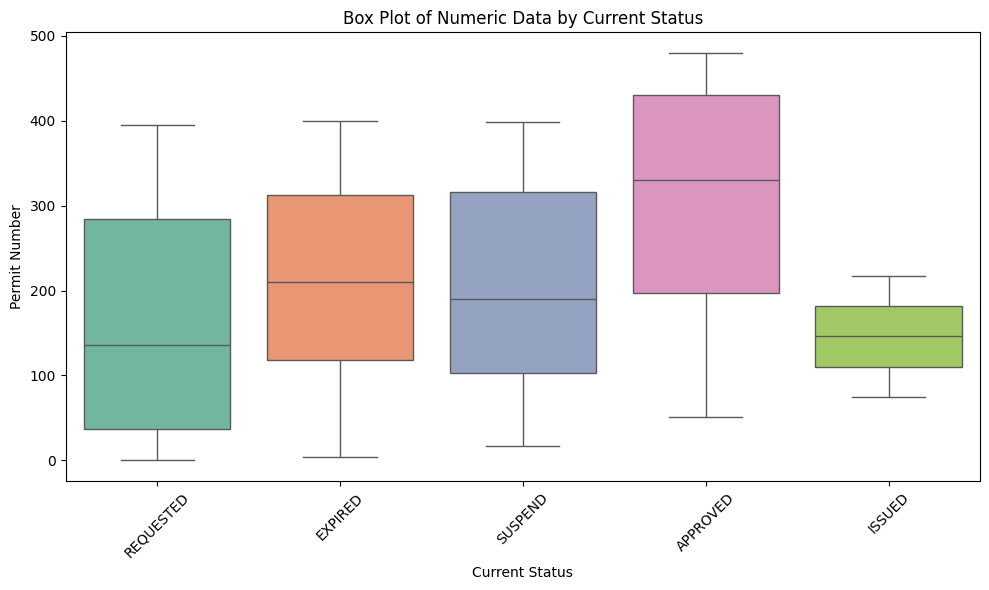

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Mobile_Food_Facility_Permit_20240406.csv')
#sns.set_palette("Set2")

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Status', y=df.index, palette = 'Set2')
plt.title('Box Plot of Numeric Data by Current Status')
plt.xlabel('Current Status')
plt.ylabel('Permit Number')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


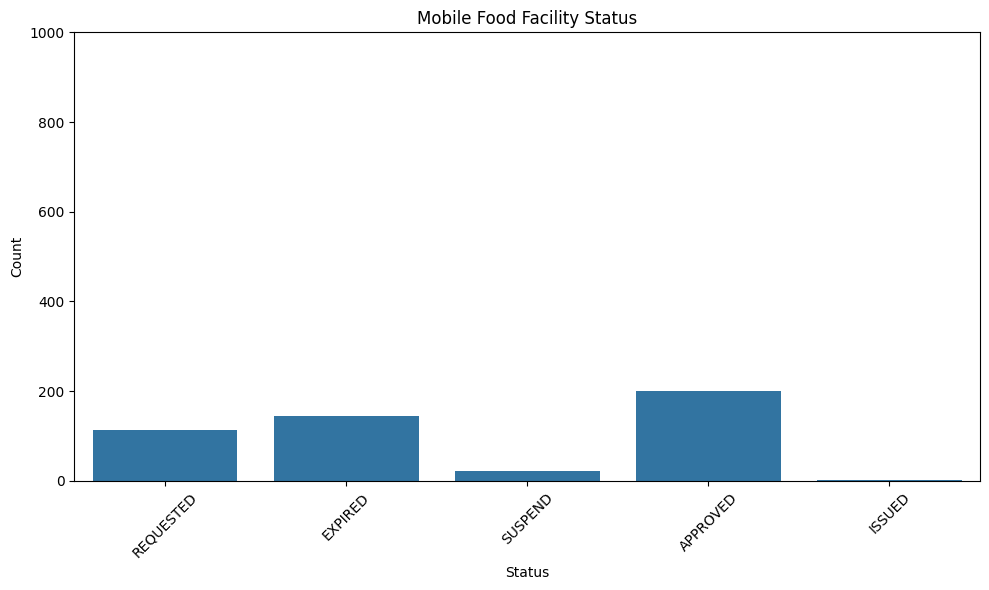

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Mobile_Food_Facility_Permit_20240406.csv')

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Status')
plt.title('Mobile Food Facility Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

<ipython-input-10-ee88b92c0e11>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette = custom_colors)
<ipython-input-10-ee88b92c0e11>:18: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data=df, x='Status', palette = custom_colors)


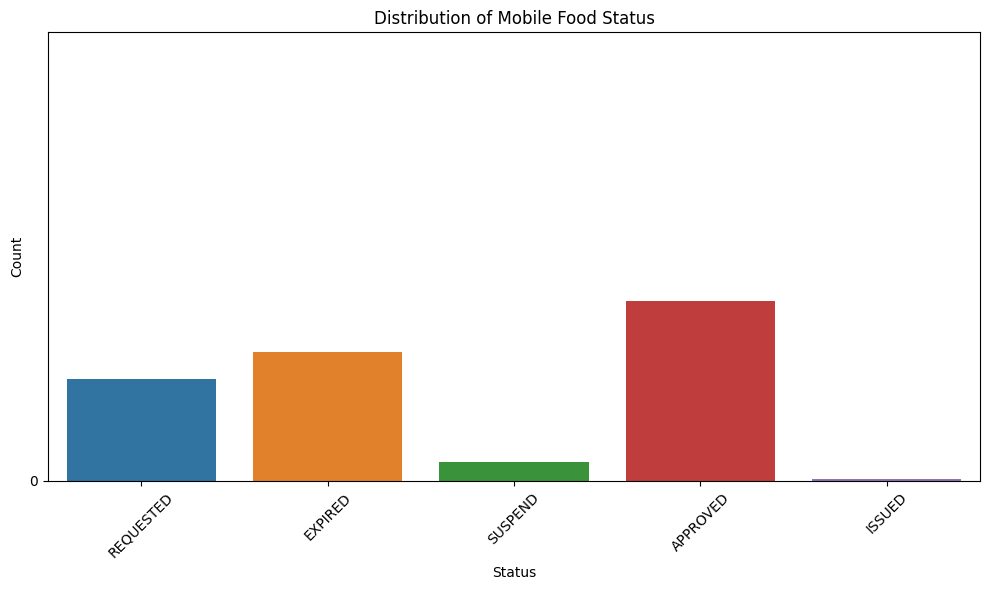

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Read the CSV file into a pandas DataFrame
df = pd.read_csv('Mobile_Food_Facility_Permit_20240406.csv')
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

#Calculate the maximum count for y-axis limit
max_count = df['Status'].value_counts().max()

#Round up to the nearest 500
y_upper_limit = ((max_count + 499) // 500) *500

#Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Status', palette = custom_colors)
plt.title('Distribution of Mobile Food Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

#Set the y-axis limit to 5000 and ticks with intervals of 10000
plt.ylim(0, y_upper_limit)
plt.yticks(np.arange(0, y_upper_limit + 1, 10000))
plt.tight_layout()
plt.show()

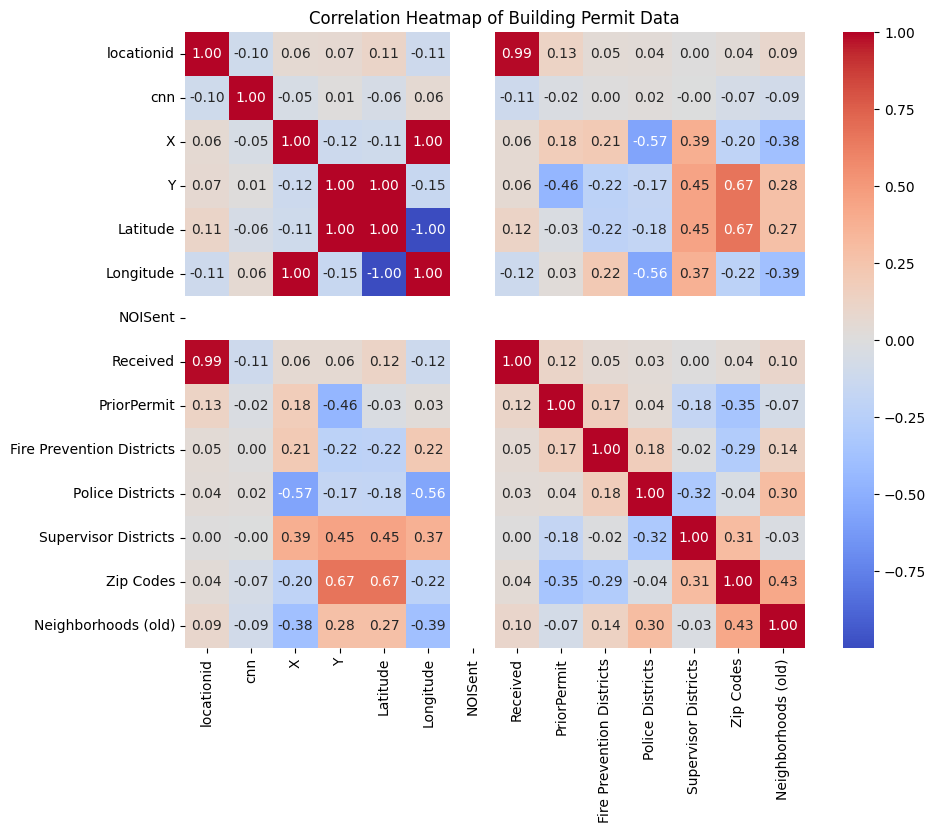

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Mobile_Food_Facility_Permit_20240406.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Building Permit Data')
plt.show()

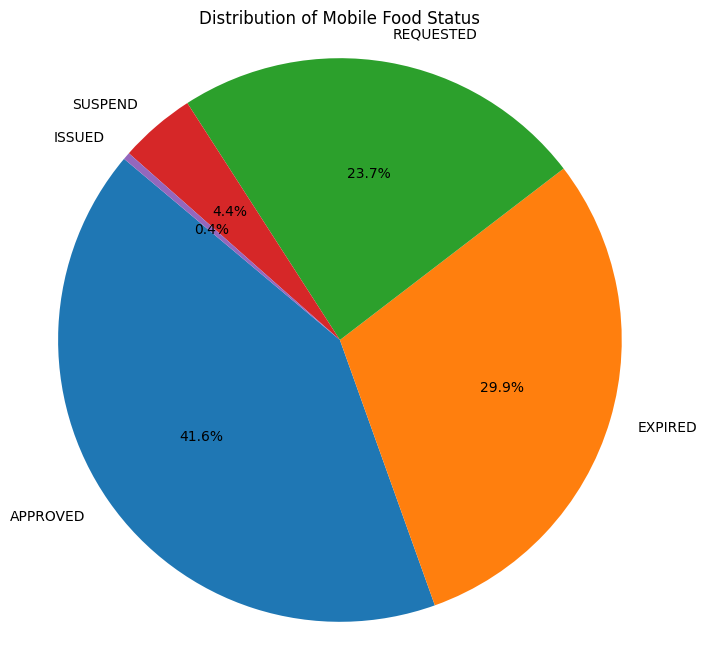

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Mobile_Food_Facility_Permit_20240406.csv')

# Count the occurrences of each status
status_counts = df['Status'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mobile Food Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

# Load the dataset
df = pd.read_csv("Mobile_Food_Facility_Permit_20240406.csv", low_memory=False)  # Handle mixed data types

# Preprocess the data
# Assuming you have features and a target column
X = df[['cnn']]  # Selecting 'Street Number' column as a feature
y = df['cnn']  # Adjust target_column_name with your target column

# Encode categorical target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input (assuming your features are in 2D shape)
# If your features are in 1D shape, you can skip this step
# X_train = X_train.values.reshape(-1, num_features, 1)
# X_test = X_test.values.reshape(-1, num_features, 1)

# Define the number of classes in your target
num_classes = len(np.unique(y))

# Build the CNN model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)



Epoch 1/10
12/12 [==============================] - 2s 37ms/step - loss: 1209253.3750 - accuracy: 0.0130 - val_loss: 608848.6250 - val_accuracy: 0.0103
Epoch 2/10
12/12 [==============================] - 0s 9ms/step - loss: 889409.7500 - accuracy: 0.0026 - val_loss: 379513.3125 - val_accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 0s 9ms/step - loss: 633026.6250 - accuracy: 0.0078 - val_loss: 249821.5625 - val_accuracy: 0.0309
Epoch 4/10
12/12 [==============================] - 0s 9ms/step - loss: 435217.7188 - accuracy: 0.0156 - val_loss: 181623.0938 - val_accuracy: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 0s 8ms/step - loss: 286434.2188 - accuracy: 0.0286 - val_loss: 127837.8125 - val_accuracy: 0.0103
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 158261.4219 - accuracy: 0.0260 - val_loss: 70454.8984 - val_accuracy: 0.0000e+00
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 73138.4531 - ac